# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [5]:
# conda list

In [2]:
pip install --upgrade tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-none-any.whl size=19559 sha256=72ee2947859a9550c3682922ccb916868368dc0a67b2e246295dd0d7c4da185b
  Stored in directory: C:\Users\LENOVO\AppData\Local\pip\Cache\wheels\b1\c2\ed\d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=12f78f8bbb6b2bc5dd9b19b7cda4a063838815eb69353b6b8e52a0a9b6a2ef73
  Stored in directory: C:\Users\LENOVO\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built wrapt termcolor
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Found existing installation: wheel 0.33.4
    Uninstalling wheel-0.33.4:
      Successfully uninstalled wheel-0.33.4
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Found existing installation: h5py 2.9.0
    Un

ERROR: astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Loading libraries

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

In [8]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [9]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])
df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['fuelsystem'] = labelencoder.fit_transform(df['fuelsystem'])
df['enginetype'] = labelencoder.fit_transform(df['enginetype'])
df['cylindernumber'] = labelencoder.fit_transform(df['cylindernumber'])

In [13]:
df['doornumber'] = df['doornumber'].map({'two':2,'four':4})
df['enginelocation'] = df['enginelocation'].map({'front':1,'rear':2})

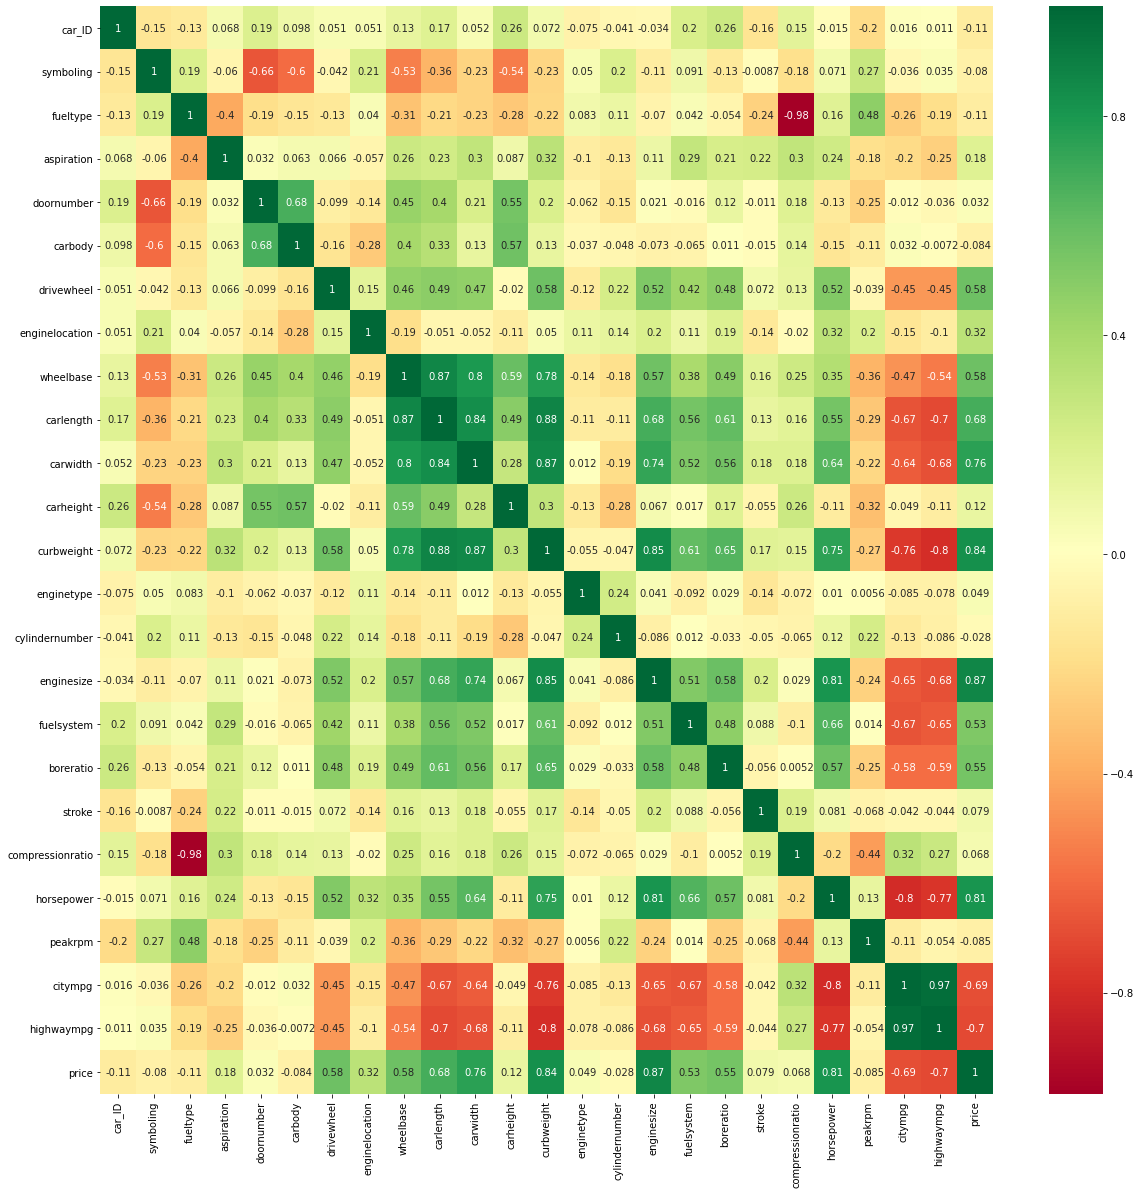

In [15]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
df.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
cylindernumber     -0.027628
doornumber          0.031835
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [17]:
data1 = df[['highwaympg','citympg','fuelsystem','boreratio','wheelbase','drivewheel',
              'carlength','carwidth','horsepower','curbweight','enginesize','price']]

In [18]:
data_f = data1.sample(frac=1)

In [19]:
x = (data_f.loc[:, data_f.columns != 'price'])
y = (data_f.loc[:, data_f.columns == 'price'])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

In [21]:
mean=x_train.mean(axis=0)
x_train -= mean
std=x_train.std(axis=0)
x_train /= std

print(mean)
print(std)

x_train

highwaympg      30.705882
citympg         25.156863
fuelsystem       3.137255
boreratio        3.341078
wheelbase       98.990196
drivewheel       1.372549
carlength      174.703922
carwidth        66.013725
horsepower     103.705882
curbweight    2581.598039
enginesize     128.323529
dtype: float64
highwaympg      7.141551
citympg         6.662657
fuelsystem      1.985289
boreratio       0.258874
wheelbase       5.984394
drivewheel      0.578861
carlength      11.667590
carwidth        2.193782
horsepower     42.402033
curbweight    528.484856
enginesize     44.688174
dtype: float64


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
49,-1.919175,-1.824627,0.938274,0.768411,0.502942,1.083940,1.456691,2.090579,3.733173,2.589293,4.423463
119,-0.098842,-0.173634,1.441979,-1.201660,-0.883999,-0.643589,-1.491647,-1.009091,-0.040231,-0.858299,-0.678558
149,-1.079021,-0.323724,0.938274,1.077442,-0.349274,-2.371118,-0.094614,-0.279757,0.172023,0.129430,-0.454785
107,-0.938995,-0.924085,0.938274,0.459380,1.488840,1.083940,1.028154,1.087744,-0.158150,0.829545,-0.186258
130,0.041184,-0.323724,0.938274,0.459380,-0.482956,-0.643589,0.582475,0.221660,-0.323236,-0.004916,0.082269
18,3.121747,3.278443,-1.076546,-1.665207,-1.769635,-0.643589,-2.880108,-2.604509,-1.313755,-2.069308,-1.506518
64,0.181210,0.126547,-1.076546,0.188978,-0.031782,-0.643589,0.265357,0.221660,-0.464739,-0.296315,-0.141503
46,-0.238867,-0.173634,1.945684,0.343494,-0.499666,1.083940,-0.180322,-0.370924,-0.323236,0.288375,-0.208635
150,1.161389,1.477359,-1.076546,-1.124403,-0.549796,-0.643589,-1.371656,-1.100257,-0.983582,-1.128884,-0.812822
108,0.321235,0.426727,-0.069136,1.386473,1.488840,1.083940,1.028154,1.087744,-0.205318,1.164465,0.529815


In [22]:
mean=x_test.mean(axis=0)
x_test -= mean
std=x_test.std(axis=0)
x_test /= std

print(mean)
print(std)

x_test

highwaympg      30.540984
citympg         24.983607
fuelsystem       3.311475
boreratio        3.333443
wheelbase       98.314754
drivewheel       1.213115
carlength      173.224590
carwidth        65.804918
horsepower     104.885246
curbweight    2530.409836
enginesize     125.245902
dtype: float64
highwaympg      6.749256
citympg         6.761390
fuelsystem      2.125566
boreratio       0.281779
wheelbase       6.093161
drivewheel      0.551203
carlength      13.405206
carwidth        2.165058
horsepower     36.808105
curbweight    500.911715
enginesize     38.566676
dtype: float64


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
21,1.549655,1.777208,-1.087463,-1.289813,-0.757366,-0.386635,-1.187941,-0.926034,-1.002096,-1.306437,-0.913895
195,-0.376484,-0.293373,0.794388,1.584777,0.982289,1.427577,1.161893,0.644362,0.247629,1.005347,0.408490
13,-0.376484,-0.589170,0.794388,-0.083195,0.473522,1.427577,0.266718,-0.464153,0.437804,0.468326,1.004860
70,-0.820977,-0.441271,-0.146538,0.875001,2.836827,1.427577,2.191343,2.722829,0.492140,2.474668,1.497513
123,-0.080155,-0.145474,-1.087463,0.058760,0.818171,-0.386635,0.102603,-0.556529,-0.458737,0.009164,-0.084163
76,1.549655,1.777208,-1.087463,-1.289813,-0.757366,-0.386635,-1.187941,-0.648906,-1.002096,-1.222590,-0.862037
169,-0.080155,-0.145474,0.794388,1.016957,0.013990,1.427577,0.221959,-0.094648,0.301965,0.041105,0.538136
53,1.105161,0.889816,-1.087463,-1.076880,-0.855837,-0.386635,-0.479261,-0.741282,-1.002096,-1.168689,-0.887966
112,0.364339,0.446120,-0.146538,1.300867,1.573115,1.427577,1.005237,1.198620,-0.268562,1.440554,0.693710
190,-0.228319,-0.145474,0.794388,-0.509060,-0.626071,-0.386635,-0.561318,-0.833658,-0.404401,-0.617693,-0.421242


In [23]:
mean=x_val.mean(axis=0)
x_val -= mean
std=x_val.std(axis=0)
x_val /= std

print(mean)
print(std)

x_val

highwaympg      31.166667
citympg         25.714286
fuelsystem       3.452381
boreratio        3.296905
wheelbase       98.830952
drivewheel       1.380952
carlength      173.657143
carwidth        65.800000
horsepower     104.000000
curbweight    2528.880952
enginesize     125.880952
dtype: float64
highwaympg      6.588670
citympg         6.029544
fuelsystem      1.940611
boreratio       0.286820
wheelbase       6.118723
drivewheel      0.491507
carlength      12.520756
carwidth        2.031340
horsepower     36.979889
curbweight    538.849280
enginesize     39.011695
dtype: float64


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
79,-0.177072,-0.284314,1.312792,-0.930565,-0.952969,-0.775069,-1.306402,-0.984572,-0.054083,-0.712409,-0.714682
97,0.885358,0.876636,-1.263716,-0.512184,-0.707820,-0.775069,-0.276113,-0.984572,-0.946460,-0.912836,-0.740315
182,2.251340,1.871736,-0.233113,-1.000295,-0.250208,-0.775069,-0.156312,-0.147686,-1.406170,-0.497135,-0.740315
152,1.037134,0.876636,-1.263716,-0.860835,-0.511700,-0.775069,-1.194588,-1.083029,-1.135752,-0.953664,-0.868482
75,-1.087726,-1.113564,0.797491,1.684314,0.632329,1.259488,0.378800,1.083029,1.919962,0.707283,0.361918
134,-0.480623,-0.781864,0.797491,-2.638953,0.043971,-0.775069,1.033712,0.344600,0.162250,0.330554,-0.125115
45,1.796013,2.037586,-1.263716,-0.930565,-0.707820,-0.775069,-1.418216,-1.083029,-0.919419,-1.150379,-0.919749
143,0.126480,0.047386,0.797491,1.126473,-0.266551,-0.775069,-0.132352,-0.196914,-0.270417,-0.350527,-0.458349
120,1.037134,0.876636,-1.263716,-1.139755,-0.838566,-0.775069,-1.306402,-0.984572,-0.973502,-1.042742,-0.919749
198,-1.391277,-1.445264,0.797491,1.126473,0.893822,1.259488,1.209420,0.689200,1.568420,0.957817,0.105585


In [24]:
model=Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1))

In [25]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [26]:
history=model.fit(x_train,y_train,epochs=300,validation_data=(x_val, y_val))

Epoch 1/300
4/4 [==============================] - 1s 111ms/step - loss: 219353916.8000 - mae: 12798.6043 - val_loss: 207005888.0000 - val_mae: 12614.5918
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 233001606.4000 - mae: 13255.7664 - val_loss: 207003456.0000 - val_mae: 12614.4941
Epoch 3/300
4/4 [==============================] - 0s 17ms/step - loss: 244576678.4000 - mae: 13414.2463 - val_loss: 207001472.0000 - val_mae: 12614.4082
Epoch 4/300
4/4 [==============================] - 0s 16ms/step - loss: 234934188.8000 - mae: 13139.1797 - val_loss: 206999408.0000 - val_mae: 12614.3184
Epoch 5/300
4/4 [==============================] - 0s 16ms/step - loss: 270869283.2000 - mae: 14066.1627 - val_loss: 206997232.0000 - val_mae: 12614.2275
Epoch 6/300
4/4 [==============================] - 0s 17ms/step - loss: 231185206.4000 - mae: 12923.3686 - val_loss: 206994848.0000 - val_mae: 12614.1357
Epoch 7/300
4/4 [==============================] - 0s 16ms/step - loss: 220

Epoch 54/300
4/4 [==============================] - 0s 17ms/step - loss: 240331392.0000 - mae: 13213.5707 - val_loss: 206494576.0000 - val_mae: 12595.1963
Epoch 55/300
4/4 [==============================] - 0s 17ms/step - loss: 222799846.4000 - mae: 13021.7971 - val_loss: 206468896.0000 - val_mae: 12594.2266
Epoch 56/300
4/4 [==============================] - 0s 17ms/step - loss: 236942563.2000 - mae: 13374.3172 - val_loss: 206445904.0000 - val_mae: 12593.2832
Epoch 57/300
4/4 [==============================] - 0s 17ms/step - loss: 254629113.6000 - mae: 13635.8127 - val_loss: 206420208.0000 - val_mae: 12592.3096
Epoch 58/300
4/4 [==============================] - 0s 18ms/step - loss: 252991849.6000 - mae: 13642.8016 - val_loss: 206396464.0000 - val_mae: 12591.3320
Epoch 59/300
4/4 [==============================] - 0s 17ms/step - loss: 248699004.8000 - mae: 13580.0027 - val_loss: 206371648.0000 - val_mae: 12590.3301
Epoch 60/300
4/4 [==============================] - 0s 16ms/step - los

Epoch 107/300
4/4 [==============================] - 0s 16ms/step - loss: 218214297.6000 - mae: 12739.7297 - val_loss: 203764512.0000 - val_mae: 12486.1982
Epoch 108/300
4/4 [==============================] - 0s 16ms/step - loss: 219955084.8000 - mae: 12894.5400 - val_loss: 203674336.0000 - val_mae: 12482.5010
Epoch 109/300
4/4 [==============================] - 0s 16ms/step - loss: 236449315.2000 - mae: 13146.9438 - val_loss: 203586336.0000 - val_mae: 12478.9404
Epoch 110/300
4/4 [==============================] - 0s 16ms/step - loss: 239409360.0000 - mae: 13314.3756 - val_loss: 203498816.0000 - val_mae: 12475.3408
Epoch 111/300
4/4 [==============================] - 0s 15ms/step - loss: 240044537.6000 - mae: 13213.5148 - val_loss: 203404256.0000 - val_mae: 12471.4531
Epoch 112/300
4/4 [==============================] - 0s 16ms/step - loss: 241899443.2000 - mae: 13332.8076 - val_loss: 203307920.0000 - val_mae: 12467.6357
Epoch 113/300
4/4 [==============================] - 0s 16ms/ste

4/4 [==============================] - 0s 17ms/step - loss: 228895968.0000 - mae: 12862.4436 - val_loss: 196325424.0000 - val_mae: 12175.3799
Epoch 160/300
4/4 [==============================] - 0s 16ms/step - loss: 207227155.2000 - mae: 12403.4389 - val_loss: 196084048.0000 - val_mae: 12165.0957
Epoch 161/300
4/4 [==============================] - 0s 15ms/step - loss: 205494761.6000 - mae: 12338.7742 - val_loss: 195877392.0000 - val_mae: 12156.2295
Epoch 162/300
4/4 [==============================] - 0s 15ms/step - loss: 233655324.8000 - mae: 13088.6256 - val_loss: 195645664.0000 - val_mae: 12146.4170
Epoch 163/300
4/4 [==============================] - 0s 18ms/step - loss: 234921849.6000 - mae: 13092.6729 - val_loss: 195439712.0000 - val_mae: 12137.5371
Epoch 164/300
4/4 [==============================] - 0s 17ms/step - loss: 222465500.8000 - mae: 12671.3781 - val_loss: 195195712.0000 - val_mae: 12127.1553
Epoch 165/300
4/4 [==============================] - 0s 16ms/step - loss: 2387

4/4 [==============================] - 0s 17ms/step - loss: 203632044.8000 - mae: 12032.1496 - val_loss: 180867440.0000 - val_mae: 11487.7734
Epoch 212/300
4/4 [==============================] - 0s 17ms/step - loss: 197999129.6000 - mae: 11907.3646 - val_loss: 180472464.0000 - val_mae: 11468.8545
Epoch 213/300
4/4 [==============================] - 0s 17ms/step - loss: 209770921.6000 - mae: 12313.1654 - val_loss: 180106656.0000 - val_mae: 11450.8730
Epoch 214/300
4/4 [==============================] - 0s 17ms/step - loss: 200289529.6000 - mae: 11801.3625 - val_loss: 179685696.0000 - val_mae: 11432.5791
Epoch 215/300
4/4 [==============================] - 0s 16ms/step - loss: 212014428.8000 - mae: 12321.5182 - val_loss: 179305616.0000 - val_mae: 11413.6865
Epoch 216/300
4/4 [==============================] - 0s 17ms/step - loss: 213306460.8000 - mae: 12329.7963 - val_loss: 178925376.0000 - val_mae: 11395.6426
Epoch 217/300
4/4 [==============================] - 0s 17ms/step - loss: 2034

4/4 [==============================] - 0s 17ms/step - loss: 186533689.6000 - mae: 11086.2953 - val_loss: 156164176.0000 - val_mae: 10249.4863
Epoch 264/300
4/4 [==============================] - 0s 17ms/step - loss: 201092297.6000 - mae: 11618.6811 - val_loss: 155614480.0000 - val_mae: 10218.8662
Epoch 265/300
4/4 [==============================] - 0s 17ms/step - loss: 205967862.4000 - mae: 11451.9635 - val_loss: 155014224.0000 - val_mae: 10187.6582
Epoch 266/300
4/4 [==============================] - 0s 17ms/step - loss: 203895030.4000 - mae: 11499.2445 - val_loss: 154463056.0000 - val_mae: 10158.0303
Epoch 267/300
4/4 [==============================] - 0s 17ms/step - loss: 181684419.2000 - mae: 11011.6354 - val_loss: 153821104.0000 - val_mae: 10122.9854
Epoch 268/300
4/4 [==============================] - 0s 19ms/step - loss: 205603139.2000 - mae: 11642.2238 - val_loss: 153296000.0000 - val_mae: 10092.8516
Epoch 269/300
4/4 [==============================] - 0s 16ms/step - loss: 2040

In [27]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

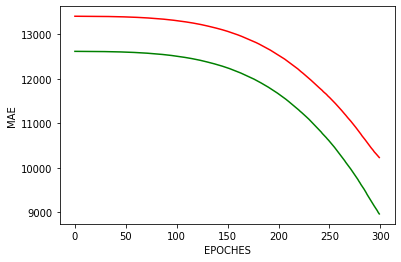

In [28]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

In [29]:
model.add(layers.Dense(32, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [30]:
model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
history = model.fit(x_train,y_train, batch_size=16, epochs=300, validation_data=(x_val, y_val))

Epoch 1/300
7/7 [==============================] - 1s 37ms/step - loss: 221375316.0000 - mae: 12636.5089 - val_loss: 180013744.0000 - val_mae: 11447.6182
Epoch 2/300
7/7 [==============================] - 0s 9ms/step - loss: 202621906.0000 - mae: 12065.5562 - val_loss: 172008720.0000 - val_mae: 11069.3350
Epoch 3/300
7/7 [==============================] - 0s 9ms/step - loss: 208811450.0000 - mae: 11993.2463 - val_loss: 163649808.0000 - val_mae: 10654.8262
Epoch 4/300
7/7 [==============================] - 0s 9ms/step - loss: 205255796.0000 - mae: 11786.1472 - val_loss: 154756480.0000 - val_mae: 10189.7734
Epoch 5/300
7/7 [==============================] - 0s 8ms/step - loss: 199405874.0000 - mae: 11468.8485 - val_loss: 144747440.0000 - val_mae: 9631.8672
Epoch 6/300
7/7 [==============================] - 0s 8ms/step - loss: 180757302.0000 - mae: 10550.6536 - val_loss: 135923808.0000 - val_mae: 9098.8398
Epoch 7/300
7/7 [==============================] - 0s 9ms/step - loss: 174047884.00

7/7 [==============================] - 0s 9ms/step - loss: 43398448.5000 - mae: 5432.6292 - val_loss: 28930920.0000 - val_mae: 4434.5903
Epoch 56/300
7/7 [==============================] - 0s 9ms/step - loss: 42561395.5000 - mae: 5261.3595 - val_loss: 29045084.0000 - val_mae: 4450.6553
Epoch 57/300
7/7 [==============================] - 0s 9ms/step - loss: 47872064.0000 - mae: 5827.0154 - val_loss: 28200432.0000 - val_mae: 4379.5898
Epoch 58/300
7/7 [==============================] - 0s 9ms/step - loss: 43956025.0000 - mae: 5350.4380 - val_loss: 27800010.0000 - val_mae: 4346.2632
Epoch 59/300
7/7 [==============================] - 0s 8ms/step - loss: 49342654.0000 - mae: 5319.2310 - val_loss: 27788520.0000 - val_mae: 4379.3071
Epoch 60/300
7/7 [==============================] - 0s 10ms/step - loss: 47058951.5000 - mae: 5635.6213 - val_loss: 26626682.0000 - val_mae: 4249.0239
Epoch 61/300
7/7 [==============================] - 0s 9ms/step - loss: 39082548.2500 - mae: 5072.6642 - val_los

7/7 [==============================] - 0s 9ms/step - loss: 25648257.7500 - mae: 4104.0849 - val_loss: 23336714.0000 - val_mae: 4181.8467
Epoch 110/300
7/7 [==============================] - 0s 9ms/step - loss: 25643014.0000 - mae: 4052.4329 - val_loss: 24191494.0000 - val_mae: 4264.1382
Epoch 111/300
7/7 [==============================] - 0s 9ms/step - loss: 21835892.8750 - mae: 3940.2882 - val_loss: 20703524.0000 - val_mae: 3876.9751
Epoch 112/300
7/7 [==============================] - 0s 9ms/step - loss: 26627839.7500 - mae: 4168.0293 - val_loss: 20339092.0000 - val_mae: 3830.6394
Epoch 113/300
7/7 [==============================] - 0s 9ms/step - loss: 22707791.5000 - mae: 3923.1055 - val_loss: 23017576.0000 - val_mae: 4146.2842
Epoch 114/300
7/7 [==============================] - 0s 10ms/step - loss: 24202838.0000 - mae: 3959.2459 - val_loss: 21037742.0000 - val_mae: 3926.9241
Epoch 115/300
7/7 [==============================] - 0s 9ms/step - loss: 24830795.5000 - mae: 4100.8459 - v

7/7 [==============================] - 0s 9ms/step - loss: 19064758.5000 - mae: 3518.1240 - val_loss: 20601548.0000 - val_mae: 3901.6692
Epoch 164/300
7/7 [==============================] - 0s 8ms/step - loss: 20567648.5000 - mae: 3642.2080 - val_loss: 17787670.0000 - val_mae: 3632.8501
Epoch 165/300
7/7 [==============================] - 0s 9ms/step - loss: 21125765.0000 - mae: 3702.4525 - val_loss: 17885292.0000 - val_mae: 3643.5293
Epoch 166/300
7/7 [==============================] - 0s 9ms/step - loss: 18021999.6250 - mae: 3390.6375 - val_loss: 18650414.0000 - val_mae: 3721.9062
Epoch 167/300
7/7 [==============================] - 0s 8ms/step - loss: 22059444.2500 - mae: 3625.8719 - val_loss: 20776056.0000 - val_mae: 3913.7427
Epoch 168/300
7/7 [==============================] - 0s 10ms/step - loss: 21812350.2500 - mae: 3763.7635 - val_loss: 19329192.0000 - val_mae: 3783.4653
Epoch 169/300
7/7 [==============================] - 0s 9ms/step - loss: 18558821.8750 - mae: 3392.6086 - v

7/7 [==============================] - 0s 13ms/step - loss: 19970568.8750 - mae: 3478.0963 - val_loss: 14911052.0000 - val_mae: 3310.1279
Epoch 218/300
7/7 [==============================] - 0s 12ms/step - loss: 16070762.8750 - mae: 3157.4958 - val_loss: 16802962.0000 - val_mae: 3497.6143
Epoch 219/300
7/7 [==============================] - 0s 11ms/step - loss: 15623044.6250 - mae: 3079.7225 - val_loss: 15368712.0000 - val_mae: 3356.9316
Epoch 220/300
7/7 [==============================] - 0s 10ms/step - loss: 18469179.8750 - mae: 3348.1039 - val_loss: 16094574.0000 - val_mae: 3427.6980
Epoch 221/300
7/7 [==============================] - 0s 14ms/step - loss: 17120758.8750 - mae: 3316.8072 - val_loss: 14875226.0000 - val_mae: 3302.4934
Epoch 222/300
7/7 [==============================] - 0s 11ms/step - loss: 16963191.2500 - mae: 3309.8584 - val_loss: 15433560.0000 - val_mae: 3359.2566
Epoch 223/300
7/7 [==============================] - 0s 13ms/step - loss: 16248639.0000 - mae: 3173.51

7/7 [==============================] - 0s 11ms/step - loss: 12964047.5000 - mae: 2764.1608 - val_loss: 15264352.0000 - val_mae: 3270.9597
Epoch 272/300
7/7 [==============================] - 0s 12ms/step - loss: 12832088.8750 - mae: 2725.5892 - val_loss: 14052547.0000 - val_mae: 3146.3042
Epoch 273/300
7/7 [==============================] - 0s 11ms/step - loss: 14839016.2500 - mae: 3058.1155 - val_loss: 14577880.0000 - val_mae: 3197.7188
Epoch 274/300
7/7 [==============================] - 0s 14ms/step - loss: 14787816.5000 - mae: 2912.2649 - val_loss: 13232645.0000 - val_mae: 3052.7991
Epoch 275/300
7/7 [==============================] - 0s 10ms/step - loss: 14462735.1875 - mae: 2884.4147 - val_loss: 12592756.0000 - val_mae: 2973.5759
Epoch 276/300
7/7 [==============================] - 0s 11ms/step - loss: 14173434.2500 - mae: 2825.9640 - val_loss: 14219742.0000 - val_mae: 3159.5447
Epoch 277/300
7/7 [==============================] - 0s 11ms/step - loss: 11168235.6250 - mae: 2669.85

In [31]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

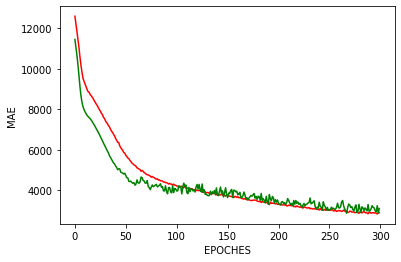

In [32]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

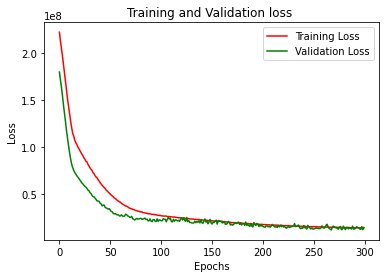

In [33]:
epochs=range(0,300)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
a=model.predict(x_test)
print(a[0])
np.array(y_test)[0]

[8150.519]


array([5572.])

In [36]:
results = model.evaluate(x_test, y_test)
results

2/2 [==============================] - 0s 2ms/step - loss: 14359386.0000 - mae: 2819.2576


[14359386.0, 2819.257568359375]